<img style="float: right;" src="meetup_logo.svg" width=200>

# Meetup - Regression Models 


<i>Predicting RSVP count using regression models</i>

<u>Models:</u>
1. <a href='#baseline'>Multivariate Linear Regression</a> (baseline) statsmodel or sklearn
2. <a href='#support'>Support Vector Regression</a> sklearn
3. <a href='#random'>Random Forest Regression</a> sklearn

Summary of Regression Model Performances:

***

## 0. Import libraries & data

#### Importing libraries

In [2]:
import numpy as np
import pickle
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Previewing data and viewing all columns

In [3]:
# import dataset
df_regression = pd.read_pickle('df_events_w_group.pickle')
df_regression.head()

,event_created,event_description,event_duration,event_url,fee,event_headcount,event_id,maybe_rsvp_count,event_name,event_rating,...,group_state,group_status,group_urlname,group_visibility,group_who,group_category,group_organizer_id,group_yrs_est,group_created_date,num_past_events
0,08/27/2018 17:36:07,Join us in person or tune in online! Livestrea...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254149786,0,"JavaScript The Easier Parts: Objects, Function...","{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
1,08/27/2018 15:59:07,Get started now on challenges related to these...,150.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254146381,0,Online Only JavaScript - The Hard Parts: Itera...,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
2,08/27/2018 17:54:44,In this workshop we’ll get a clear sense of th...,150.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254150230,0,JavaScript The Hard Parts - Promises and Async...,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
3,07/18/2018 21:06:34,The number of opportunities for software engin...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,252915161,0,How to get Hired as a Software Engineer,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
4,08/27/2018 15:24:18,Please tune into the stream here: https://zoom...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254144933,0,Codesmith Online Info Session (Online Only),"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21


In [4]:
df_regression.columns

Index(['event_created', 'event_description', 'event_duration', 'event_url',
       'fee', 'event_headcount', 'event_id', 'maybe_rsvp_count', 'event_name',
       'event_rating', 'rsvp_limit', 'event_status', 'event_time',
       'event_updated', 'event_visibility', 'waitlist_count', 'yes_rsvp_count',
       'venue_neighborhood', 'venue_latlon', 'venue_country', 'venue_id',
       'group_id', 'time_m_d_y', 'day_of_week', 'subway_distances',
       'num_close_subways', 'event_descrip_tokens', 'event_descrip_num_words',
       'has_event_fee', 'has_event_photo', 'group_created',
       'group_description', 'group_join_mode', 'group_lat', 'group_link',
       'localized_country_name', 'localized_location', 'group_lon',
       'num_members', 'group_name', 'group_state', 'group_status',
       'group_urlname', 'group_visibility', 'group_who', 'group_category',
       'group_organizer_id', 'group_yrs_est', 'group_created_date',
       'num_past_events'],
      dtype='object')

<a id='baseline'></a>
## 1. Multivariate Linear Regession

#### Baseline Model

For the baseline model, we'll use just the features that came with the data:

<p style='text-align: left;'>Dependent</p>      |<p style='text-align: left;'>Independent - numerical</p>|<p style='text-align: center;'>Independent - categorical</p>
:------------- |:---------------------------------------------- |:------------------------- 
<p style='text-align: left;'>number yes rsvps</p> |<p style='text-align: left;'>number of members in group hosting event</p>        |<p style='text-align: left;'>group category</p>
               |<p style='text-align: left;'>number of past events</p>                           |
               |<p style='text-align: left;'>duration of the event</p>               |
               
<u>Hypotheses</u>:
- $H_{0}$: there is no relationship between the dependent and independent variables
- $H_{a}$: there is a relationship between the dependent and independent variables


<u>Process</u>:
1. Create dataframe with target and baseline features only.
2. Analyze features to see whether the four assumptions of a linear model are met (no multicollinearity, normality, linearity, homoscedasticity).
3. Build baseline model.


In [5]:
# separate target and features
df_baseline = df_regression[['yes_rsvp_count', 'num_members', 'num_past_events', 'event_duration', 'group_category']]
df_baseline.head()

,yes_rsvp_count,num_members,num_past_events,event_duration,group_category
0,42,8050,21,120.0,tech
1,64,8050,21,150.0,tech
2,83,8050,21,150.0,tech
3,113,8050,21,120.0,tech
4,21,8050,21,120.0,tech


<i>Handling Categorical Data</i>

We have one categorical feature, ```group_category```, which we will dummify (or one-hot-encode) before running in the linear regression model. This will convert each unique category into a new column and assign a 1 for observations that fall under that particular category, else 0 for all other categories.

Another option here is label encoding, which assigns a number to each category so that numbers are between 0 and $number of categories - 1$. The upside of this method is that additional columns are not added to dataset. However, there is a risk that the model might view the numerical representations of the categories as actual numbers, thus potentially deriving some relationship between the numbers and the rows of data when there actually is no relationship at all.

Because the ```group_category``` has 33 unique categories, we'll use the dummy-method to avoid potentially adding noise to our dataset. We will drop one of the dummy columns as is standard practice in label-encoding for a vanilla linear regression (i.e. without any regularization). 

In [6]:
# make sure dtype of group_category is 'category'; then dummify the column
df_baseline['group_category'] = df_baseline['group_category'].astype('category')
group_category_dummies = pd.get_dummies(df_baseline['group_category'])
group_category_dummies.drop(columns=['writing'], inplace = True)

In [7]:
group_category_dummies.head()

,arts-culture,book-clubs,career-business,cars-motorcycles,community-environment,dancing,education-learning,fashion-beauty,fitness,food-drink,...,parents-family,pets-animals,photography,religion-beliefs,sci-fi-fantasy,singles,socializing,sports-recreation,support,tech
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
# merge the dummies to the baseline dataframe
df_baseline_dum = pd.concat([df_baseline, group_category_dummies], axis = 1)

In [9]:
df_baseline_dum.head()

,yes_rsvp_count,num_members,num_past_events,event_duration,group_category,arts-culture,book-clubs,career-business,cars-motorcycles,community-environment,...,parents-family,pets-animals,photography,religion-beliefs,sci-fi-fantasy,singles,socializing,sports-recreation,support,tech
0,42,8050,21,120.0,tech,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,64,8050,21,150.0,tech,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,83,8050,21,150.0,tech,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,113,8050,21,120.0,tech,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,21,8050,21,120.0,tech,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<i>Multicollinearity</i>

According to the correlation heatmap below of our numerical features, there is no strong correlation ($r$ > 0.75) within the numerical features. This means we can keep all of these features in our model.

Text(0.5, 1.0, 'Correlation Heatmap')

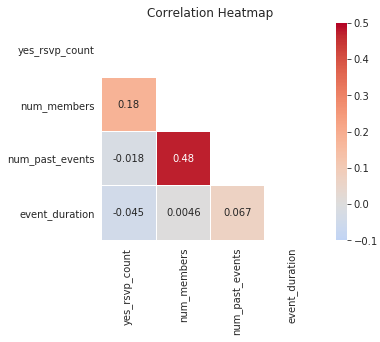

In [26]:
corr = df_baseline.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax= 0.5, vmin =-0.1, square=True, linewidth = 0.1, annot = True, center = 0, cmap = 'coolwarm')
ax.set_title("Correlation Heatmap", fontsize = 12)

Based on the pair-plot below, ```yes_rsvp_count```, ```num_members```, and ```num_past_events``` seem to be a bit normally distributed but with a strong right-skew. We will perform a log transformation on these values to reduce the skew.

```event_duration``` is not normally distributed but we'll see how the log transofrmation works on this as well.


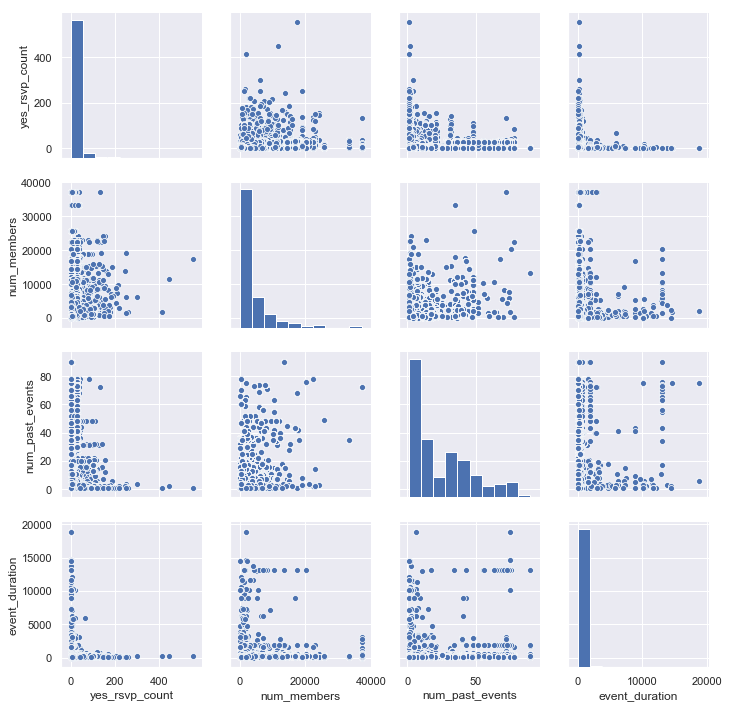

In [175]:
sns.set(style= 'darkgrid')
# sns.pairplot(df_baseline, hue = 'group_category', palette = 'muted', height = 3.5)
sns.pairplot(df_baseline)

In [76]:
# log-transforming all numerical features
df_baseline_dum['log_yes_rsvp_count'] = np.log(df_baseline_dum['yes_rsvp_count']+1)
df_baseline_dum['log_num_members'] = np.log(df_baseline_dum['num_members']+1)
df_baseline_dum['log_num_past_events'] = np.log(df_baseline_dum['num_past_events']+1)
df_baseline_dum['log_event_duration'] = np.log(df_baseline_dum['event_duration']+1)

In [174]:
# mean-normalizing all numerical features
def mean_normalize(x, x_list):
    """funcion to return mean-normalized value"""
    return (x - x_list.mean()) / (max(x_list) - min(x_list))

df_baseline_dum['munorm_yes_rsvp_count'] = df_baseline_dum['yes_rsvp_count'].apply(lambda x: mean_normalize(x, df_baseline_dum['yes_rsvp_count']))
df_baseline_dum['munorm_num_members'] = df_baseline_dum['num_members'].apply(lambda x: mean_normalize(x, df_baseline_dum['num_members']))
df_baseline_dum['munorm_num_past_events'] = df_baseline_dum['num_past_events'].apply(lambda x: mean_normalize(x, df_baseline_dum['num_past_events']))
df_baseline_dum['munorm_event_duration'] = df_baseline_dum['event_duration'].apply(lambda x: mean_normalize(x, df_baseline_dum['event_duration']))

In [137]:
df_baseline_dum.head()

,yes_rsvp_count,num_members,num_past_events,event_duration,group_category,arts-culture,book-clubs,career-business,cars-motorcycles,community-environment,...,support,tech,log_yes_rsvp_count,log_num_members,log_num_past_events,log_event_duration,munorm_yes_rsvp_count,munorm_num_members,munorm_num_past_events,munorm_event_duration
0,42,8050,21,120.0,tech,0,0,0,0,0,...,0,1,3.761200,8.993552,3.091042,4.795791,0.051530,0.115875,-0.04034,-0.009360
1,64,8050,21,150.0,tech,0,0,0,0,0,...,0,1,4.174387,8.993552,3.091042,5.017280,0.091313,0.115875,-0.04034,-0.007768
2,83,8050,21,150.0,tech,0,0,0,0,0,...,0,1,4.430817,8.993552,3.091042,5.017280,0.125672,0.115875,-0.04034,-0.007768
3,113,8050,21,120.0,tech,0,0,0,0,0,...,0,1,4.736198,8.993552,3.091042,4.795791,0.179921,0.115875,-0.04034,-0.009360
4,21,8050,21,120.0,tech,0,0,0,0,0,...,0,1,3.091042,8.993552,3.091042,4.795791,0.013556,0.115875,-0.04034,-0.009360


The mean normalized features are plotted below. Unfortunately, this particular tranformation has not normalized the data.

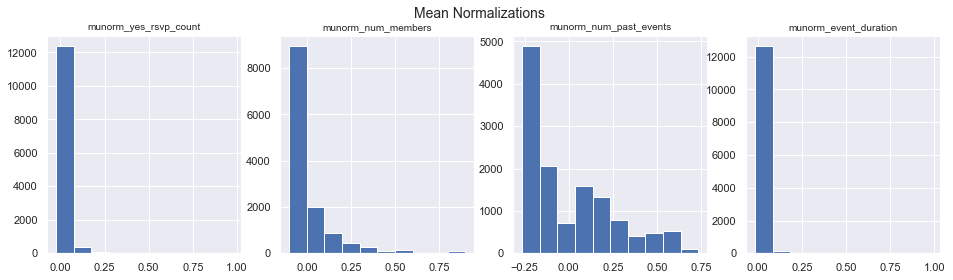

In [162]:
# plotting the mean normalized values
plt.figure(1, figsize=(16,4))
plt.suptitle('Mean Normalizations', fontsize = 14)

plt.subplot(141)
plt.hist(df_baseline_dum['munorm_yes_rsvp_count'])
plt.title('munorm_yes_rsvp_count', fontsize = 10)

plt.subplot(142)
plt.hist(df_baseline_dum['munorm_num_members'])
plt.title('munorm_num_members', fontsize = 10)

plt.subplot(143)
plt.hist(df_baseline_dum['munorm_num_past_events'])
plt.title('munorm_num_past_events', fontsize = 10)

plt.subplot(144)
plt.hist(df_baseline_dum['munorm_event_duration'])
plt.title('munorm_event_duration', fontsize = 10)

plt.show()

With a log transformation, ```log_num_members``` and ```log_event_duration``` are now looking more like a normal distribution. ```log_yes_rsvp_count``` and ```log_num_past_events``` are not as normalized but we will assume a normal distribution given our $n$ > 20.

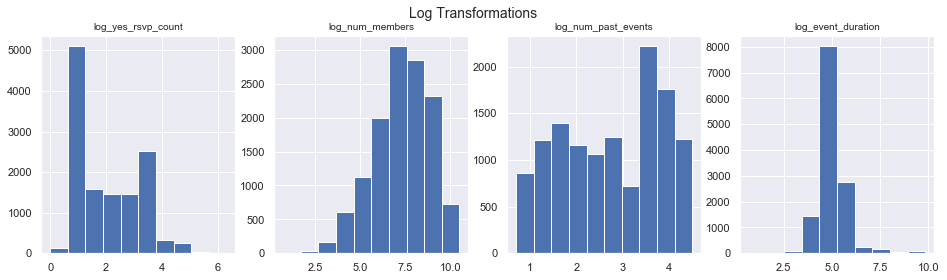

In [161]:
plt.figure(1, figsize=(16,4))
plt.suptitle('Log Transformations', fontsize = 14)

plt.subplot(141)
plt.hist(df_baseline_dum['log_yes_rsvp_count'])
plt.title('log_yes_rsvp_count', fontsize = 10)

plt.subplot(142)
plt.hist(df_baseline_dum['log_num_members'])
plt.title('log_num_members', fontsize = 10)

plt.subplot(143)
plt.hist(df_baseline_dum['log_num_past_events'])
plt.title('log_num_past_events', fontsize = 10)

plt.subplot(144)
plt.hist(df_baseline_dum['log_event_duration'])
plt.title('log_event_duration', fontsize = 10)

plt.show()

Tried combining transformation (mean normalization and log transformation) but that did not improve our results (as shown below) so we will go ahead and use the log-transformed values for all of our numerical features.

In [140]:
df_baseline_dum['mulog_yes_rsvp_count'] = df_baseline_dum['log_yes_rsvp_count'].apply(lambda x: mean_normalize(x, df_baseline_dum['log_yes_rsvp_count']))
df_baseline_dum['mulog_num_past_events'] = df_baseline_dum['log_num_past_events'].apply(lambda x: mean_normalize(x, df_baseline_dum['log_num_past_events']))


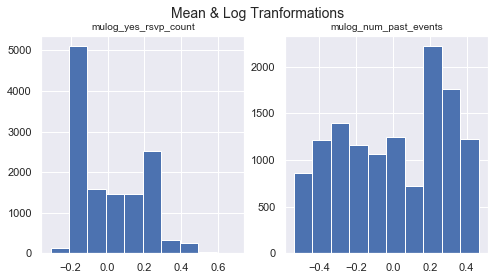

In [159]:
plt.figure(1, figsize=(8,4))
plt.suptitle('Mean & Log Tranformations', fontsize = 14)

plt.subplot(121)
plt.hist(df_baseline_dum['mulog_yes_rsvp_count'])
plt.title('mulog_yes_rsvp_count', fontsize = 10)

plt.subplot(122)
plt.hist(df_baseline_dum['mulog_num_past_events'])
plt.title('mulog_num_past_events', fontsize = 10)

plt.show()

In [142]:
df_baseline_dum.columns

Index(['yes_rsvp_count', 'num_members', 'num_past_events', 'event_duration',
       'group_category', 'arts-culture', 'book-clubs', 'career-business',
       'cars-motorcycles', 'community-environment', 'dancing',
       'education-learning', 'fashion-beauty', 'fitness', 'food-drink',
       'games', 'government-politics', 'health-wellbeing', 'hobbies-crafts',
       'language', 'lgbt', 'lifestyle', 'movies-film', 'music',
       'new-age-spirituality', 'outdoors-adventure', 'paranormal',
       'parents-family', 'pets-animals', 'photography', 'religion-beliefs',
       'sci-fi-fantasy', 'singles', 'socializing', 'sports-recreation',
       'support', 'tech', 'log_yes_rsvp_count', 'log_num_members',
       'log_num_past_events', 'log_event_duration', 'munorm_yes_rsvp_count',
       'munorm_num_members', 'munorm_num_past_events', 'munorm_event_duration',
       'mulog_yes_rsvp_count', 'mulog_num_past_events'],
      dtype='object')

In [143]:
# creating a final dataframe with the log-transformed and label-encoded values only
df_baseline_final = df_baseline_dum.drop(columns=['yes_rsvp_count','num_members', 'num_past_events', 'event_duration', 'group_category'])

In [127]:
# preview of the new dataframe
df_baseline_final.head()

,arts-culture,book-clubs,career-business,cars-motorcycles,community-environment,dancing,education-learning,fashion-beauty,fitness,food-drink,...,sci-fi-fantasy,singles,socializing,sports-recreation,support,tech,log_yes_rsvp_count,log_num_members,log_num_past_events,log_event_duration
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.761200,8.993552,3.091042,4.795791
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.174387,8.993552,3.091042,5.017280
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.430817,8.993552,3.091042,5.017280
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,4.736198,8.993552,3.091042,4.795791
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,3.091042,8.993552,3.091042,4.795791


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Meetup Data: log_yes_rsvp_count~log_num_members
-------------------------------------------------------------------------------------


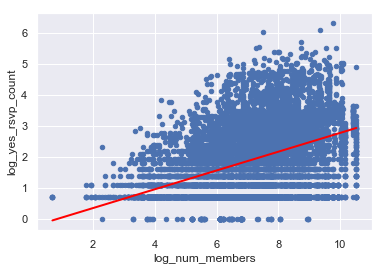

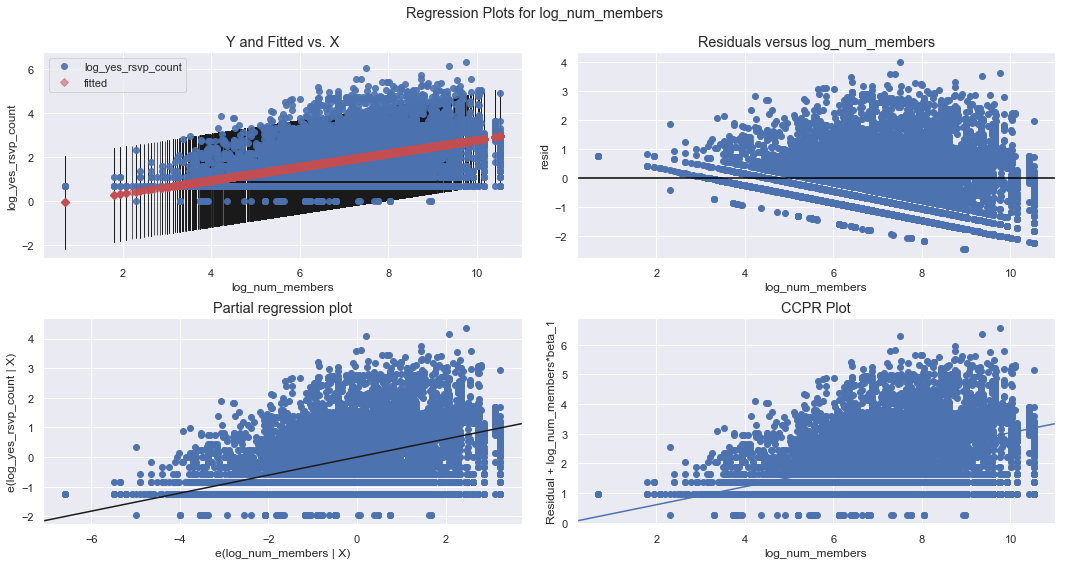

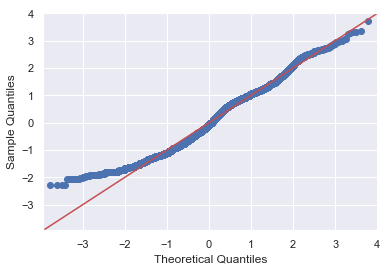

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Meetup Data: log_yes_rsvp_count~log_num_past_events
-------------------------------------------------------------------------------------


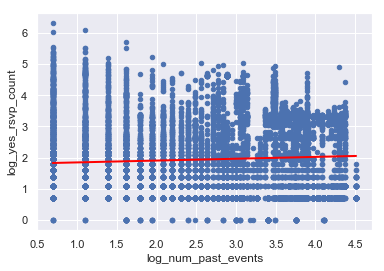

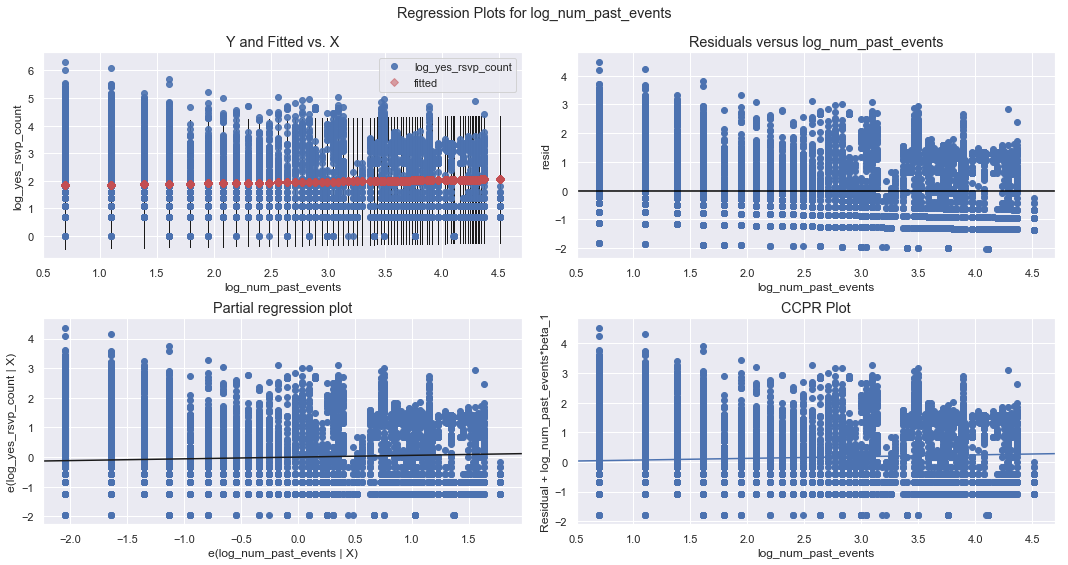

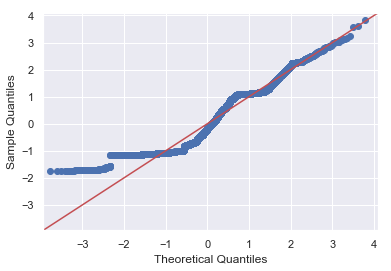

Press Enter to continue...


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Meetup Data: log_yes_rsvp_count~log_event_duration
-------------------------------------------------------------------------------------


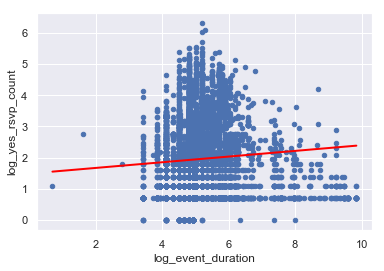

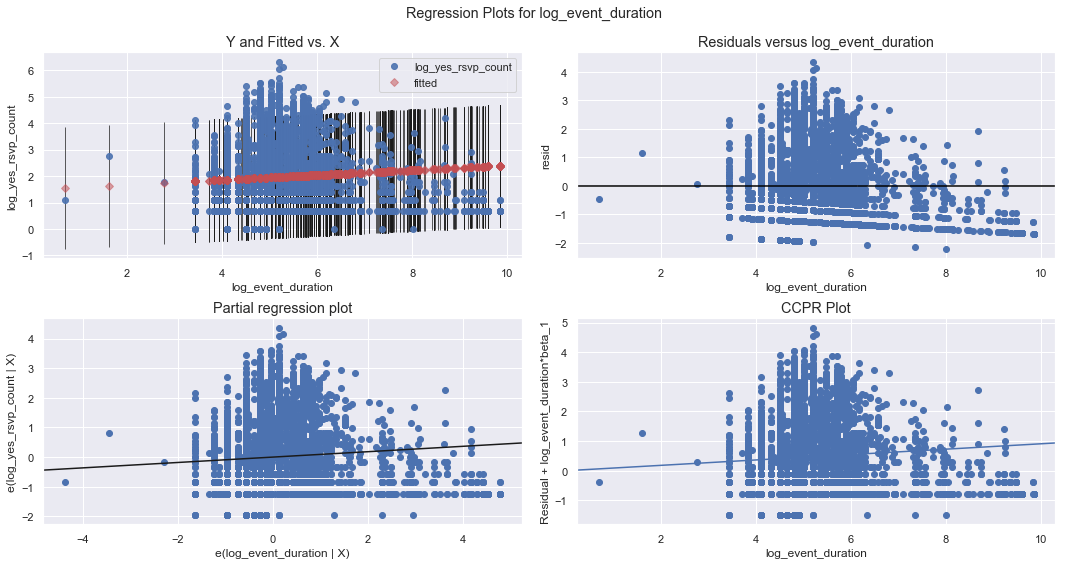

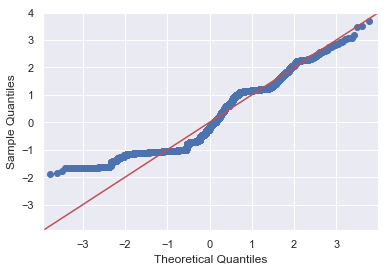

In [168]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)']]
data = df_baseline_final


for idx, val in enumerate(['log_num_members', 'log_num_past_events', 'log_event_duration']):
    print ("Meetup Data: log_yes_rsvp_count~" + val)
    print ("-------------------------------------------------------------------------------------")

    f = 'log_yes_rsvp_count~' + val

    model = smf.ols(formula=f, data=df_baseline_final).fit()
    
    X_new = pd.DataFrame({val: [data[val].min(), data[val].max()]});
    preds = model.predict(X_new)
    data.plot(kind='scatter', x=val, y='log_yes_rsvp_count');
    plt.plot(X_new, preds, c='red', linewidth=2);
    plt.show()
    fig = plt.figure(figsize=(15,8))
    fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
    fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True,   )
    plt.show()
    
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0] ])
    if idx != 2:
        input("Press Enter to continue...")
    else:
        pass

In [167]:
pd.DataFrame(results, columns = results[0]).drop(index = 0, axis = 0)

,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,log_num_members,0.159858,-0.262606,0.303609,0,325.651
2,log_num_past_events,0.00307699,1.78898,0.05902,3.05079e-10,844.47
3,log_event_duration,0.0032045,1.48933,0.0909894,1.31422e-10,904.747


In [129]:
test = df_baseline_final.sample(frac = 0.2, random_state = 328)
train = df_baseline_final.drop(test.index)

In [130]:
print(f"Number of rows in test set: {len(test)}")

Number of rows in test set: 2573


In [131]:
print(f"Number of rows in train set: {len(train)}")

Number of rows in train set: 10293


In [132]:
print(f"{len(test)}/{len(df_baseline_final)}")
print(len(test)/len(df_baseline_final))

2573/12866
0.19998445515311675


The results of the train and test sets are below. The $R^2$ values are very close to 0 indicating that the model is not doing well to explain the variance of the independent variables. The low $R^2$ is not surprising since our graphs above demonstrated that the linear model assumptions were not being met by the data, and therefore a linar model would not be a good choice.

$R^2$ values:<br>
- Train = 0.189<br>
- Test = 0.194

Interestingly, the model fit the test set a little better than the train set so we know that with this baseline model, there was no overfitting.

$p$-value of independent variables in both the train and test models are less than 0.05 meaning we can reject the null hypothesis and confirm that there is some relationship between the dependent and independent variables.

In [133]:
# TRAIN
baseline_train = smf.ols(formula='log_yes_rsvp_count ~ log_num_members + log_num_past_events + log_event_duration', data=train).fit()
print(baseline_train.params)
baseline_train.summary()

Intercept             -0.069120
log_num_members        0.385020
log_num_past_events   -0.220524
log_event_duration    -0.036582
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_yes_rsvp_count   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     801.3
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        17:08:03   Log-Likelihood:                -15201.
No. Observations:               10293   AIC:                         3.041e+04
Df Residuals:                   10289   BIC:                         3.044e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0691      0.082     -0.840      0.401      -0.230       0.092
log_num_members         0.3850      0.008     48.265      0.000       0.369       0.401
log_num_past_events    -0.2205      0.011    -19.972      0.000      -0.242      -0.199
log_event_duration     -0.0366      0.015     -2.506      0.012      -0.065      -0.008
==============================================================================
Omnibus:                      732.384   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.042
Skew:                           0.235   Prob(JB):                     1.59e-71
Kurtosis:                       2.265   Cond. No.                         75.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
# TEST
baseline_test = smf.ols(formula='log_yes_rsvp_count ~ log_num_members + log_num_past_events + log_event_duration', data=test).fit()
print(baseline_test.params)
baseline_test.summary()

Intercept              0.001893
log_num_members        0.389013
log_num_past_events   -0.197856
log_event_duration    -0.066304
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     log_yes_rsvp_count   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 03 May 2019   Prob (F-statistic):          1.81e-120
Time:                        16:56:34   Log-Likelihood:                -3791.1
No. Observations:                2573   AIC:                             7590.
Df Residuals:                    2569   BIC:                             7614.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.0019      0.161      0.012      0.991      -0.315       0.318
log_num_members         0.3890      0.016     24.468      0.000       0.358       0.420
log_num_past_events    -0.1979      0.022     -9.137      0.000      -0.240      -0.155
log_event_duration     -0.0663      0.028     -2.330      0.020      -0.122      -0.011
==============================================================================
Omnibus:                      164.785   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.983
Skew:                           0.222   Prob(JB):                     3.17e-17
Kurtosis:                       2.284   Cond. No.                         74.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Model with engineered features
We'll now run the regression again adding our engineered features to the baseline model:

<p style='text-align: left;'>Dependent</p>      |<p style='text-align: left;'>Independent - numerical</p>|<p style='text-align: center;'>Independent - categorical</p>
:------------- |:---------------------------------------------- |:------------------------- 
<p style='text-align: left;'>number of yes rsvps</p> |<p style='text-align: left;'>number of members in group hosting event</p>        |<p style='text-align: left;'>day of week of the event</p>
               |<p style='text-align: left;'>number of past events</p>                           |<p style='text-align: left;'>group category</p>
               |<p style='text-align: left;'>number of words in event description</p>            |<p style='text-align: left;'>fee or no fee event</p>
               |<p style='text-align: left;'>number of subway stations <0.5 miles from venue</p> |
               |<p style='text-align: left;'>number of years the group has been around</p>       |
               |<p style='text-align: left;'>duration of the event</p>                           |
               |<p style='text-align: left;'>timestamp of the event</p>                          |


In [169]:
df_regression.head()

,event_created,event_description,event_duration,event_url,fee,event_headcount,event_id,maybe_rsvp_count,event_name,event_rating,...,group_state,group_status,group_urlname,group_visibility,group_who,group_category,group_organizer_id,group_yrs_est,group_created_date,num_past_events
0,08/27/2018 17:36:07,Join us in person or tune in online! Livestrea...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254149786,0,"JavaScript The Easier Parts: Objects, Function...","{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
1,08/27/2018 15:59:07,Get started now on challenges related to these...,150.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254146381,0,Online Only JavaScript - The Hard Parts: Itera...,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
2,08/27/2018 17:54:44,In this workshop we’ll get a clear sense of th...,150.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254150230,0,JavaScript The Hard Parts - Promises and Async...,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
3,07/18/2018 21:06:34,The number of opportunities for software engin...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,252915161,0,How to get Hired as a Software Engineer,"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21
4,08/27/2018 15:24:18,Please tune into the stream here: https://zoom...,120.0,https://www.meetup.com/Build-with-Code-New-Yor...,0.0,0,254144933,0,Codesmith Online Info Session (Online Only),"{'count': 0, 'average': 0}",...,NY,active,Build-with-Code-New-York,public,Engineers,tech,218119162,2.276969,01/20/2017 01:45:02,21


In [171]:
df_regression.columns

Index(['event_created', 'event_description', 'event_duration', 'event_url',
       'fee', 'event_headcount', 'event_id', 'maybe_rsvp_count', 'event_name',
       'event_rating', 'rsvp_limit', 'event_status', 'event_time',
       'event_updated', 'event_visibility', 'waitlist_count', 'yes_rsvp_count',
       'venue_neighborhood', 'venue_latlon', 'venue_country', 'venue_id',
       'group_id', 'time_m_d_y', 'day_of_week', 'subway_distances',
       'num_close_subways', 'event_descrip_tokens', 'event_descrip_num_words',
       'has_event_fee', 'has_event_photo', 'group_created',
       'group_description', 'group_join_mode', 'group_lat', 'group_link',
       'localized_country_name', 'localized_location', 'group_lon',
       'num_members', 'group_name', 'group_state', 'group_status',
       'group_urlname', 'group_visibility', 'group_who', 'group_category',
       'group_organizer_id', 'group_yrs_est', 'group_created_date',
       'num_past_events'],
      dtype='object')

In [ ]:
# create dataframe for the updated model
df_engineered = df_regression[['event_time','day_of_week', 'num_close_subways', 'event_descrip_num_words',
                               'has_event_fee', 'has_event_photo','group_yrs_est']]

In [ ]:
# log-transformed features to concat to df_engineered
df_logs = df_baseline_dum[['log_yes_rsvp_count','log_num_members',
                           'log_num_past_events', 'log_event_duration']]

In [ ]:
# dummified group_category to concat to df_engineered

#### Feature Engineering

Let's take a look to make sure the assumptions of a linear model are met with this data.

Assumptions:
1. Linearity
2. Normality
3. Homoscedasticity
4. No multicollinearity

We also want to make sure that numerical variables are standardized and categorical variables are encoded before passing through the model.

#### Train-test-split
Now that our dataset is ready, we will split the data into a train and test set using the 80/20 Pareto rule. The split will be made with a specified random state to ensure the same train and test values are passed into each model as a control.

Given the large dataset size, we will not use k-folds cross-validation method (involves averaging the results of k-1 train sets and 1 test set) at this time.

***
<a id='support'></a>
## 2. Support Vector Regression

***
<a id='random'></a>
## 3. Random Forest Regression

Note: use gridsearch to get optimal hyperparameters.

In [ ]:
# for topic modelling:
## import gensim
## pyLDAvis